In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks


import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

# Project Details:

- This project will be about analyzing weather patterns in London. 

# Part 1 - Load the data and make datatime index 

In [101]:

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/christianrim/Documents/Weather Analysis/Data/london_weather.csv')


# Display the first few rows of the DataFrame
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [103]:
#adding a datetime column based on the string in the "date" column
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [104]:
# setting the index for the "date" column 
df = df.set_index('date')

In [105]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [106]:
# confirmation that the data has changed 
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [107]:
# keeeping only the required features and data from the year 2000
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00


In [108]:
# checking for missing values 
df.isna().sum()

precipitation       6
mean_temp          36
min_temp            2
max_temp            6
snow_depth       1441
dtype: int64

In [109]:
df.ffill(inplace=True)  # Forward fill missing values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations

## What month had the most precipitation between 2000 through 2010?

In [110]:
pre_col = ['precipitation']
preci_data = df.loc['2000':'2010', pre_col].resample('M').sum()
preci_data

,precipitation
date,
2000-01-31,16.50
2000-02-29,62.20
2000-03-31,16.00
2000-04-30,99.60
2000-05-31,87.20
...,...
2010-08-31,88.60
2010-09-30,38.20
2010-10-31,74.80


In [111]:
date_max = preci_data['precipitation'].idxmax()
date_max

Timestamp('2000-10-31 00:00:00', freq='M')

In [112]:
maxp = preci_data['precipitation'].max()
maxp

155.4

In [113]:
# creating tick locators and data formatters 

# Creating the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=4)

# For major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")


In [356]:
date_max = preci_data['precipitation'].idxmax()
date_max

Timestamp('2000-10-31 00:00:00', freq='M')

In [357]:
maxp = preci_data['precipitation'].max()
maxp

155.4

In [367]:
# creating tick locators and data formatters 

# Creating the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=4)

# For major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

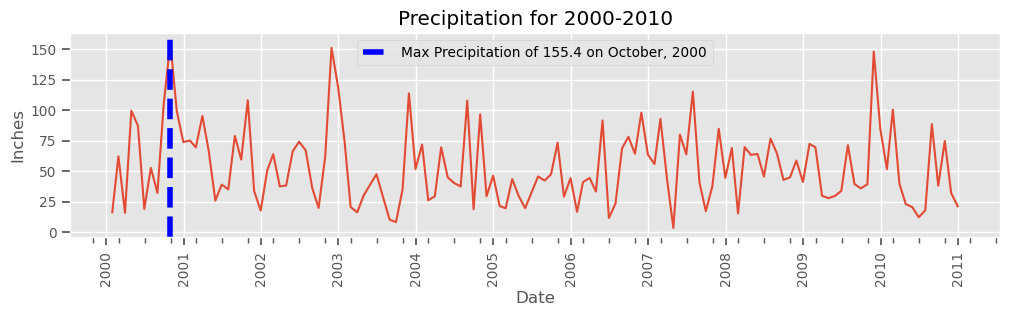

In [114]:
# Making the fig and axis
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(preci_data)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel='Date')
# Minor ticks
ax.xaxis.set_minor_locator(loc_3months)

# Major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

# Making major/minor gridlines visually distince
fig.autofmt_xdate(rotation=90,ha='center')

# Making a vline
ax.axvline(x=date_max, color='b', lw=4, ls='--', label= f'Max Precipitation of {maxp} on {date_max.strftime("%B, %Y")}')
# Making a legend/labels
ax.legend();

### Question 1 Results: Based on the result, the highest Precipitation occured at the end of 2000. 

## Which year between 2000-2020 had the coolest average temperature?

In [115]:
temp_cols = ['mean_temp']
data_df = df.loc['2000':'2020', temp_cols].resample('Y').mean()
data_df[:15]

,mean_temp
date,
2000-12-31,11.58
2001-12-31,11.34
2002-12-31,12.08
2003-12-31,12.14
2004-12-31,11.87
2005-12-31,11.82
2006-12-31,12.27
2007-12-31,11.90
2008-12-31,11.32


In [116]:
# finding the date with the minimum average temperature
date_min = data_df['mean_temp'].idxmin()
date_min

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [117]:
mint = data_df['mean_temp'].min()
umint = round(mint, 2)
umint

10.64

In [118]:
# creating locators to place ticks every year 
single_year = mdates.YearLocator()

# For major year ticks
# creating  locators to place ticks every 5 years
interval_year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")

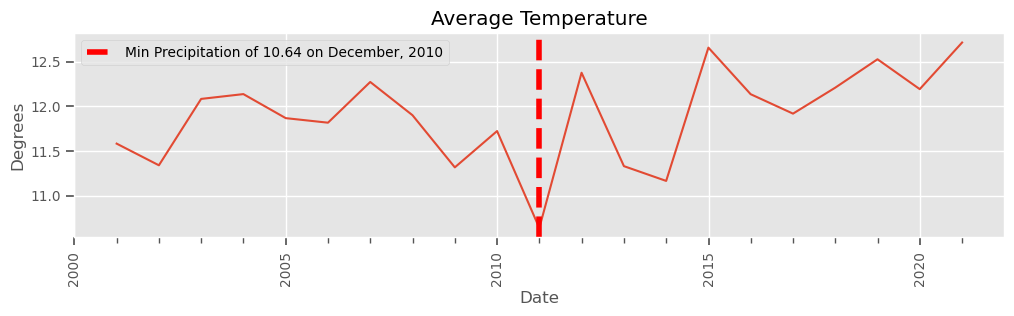

In [120]:
fig, ax = plt.subplots(figsize=(12,3)) ## setting up the grid for plotting 
ax.plot(data_df)
ax.set(title='Average Temperature', ylabel='Degrees', xlabel='Date')
# Minor ticks
ax.xaxis.set_minor_locator(single_year)

# Major ticks
ax.xaxis.set_major_locator(interval_year)
ax.xaxis.set_major_formatter(fmt_year)

# Making major/minor gridlines visually distince
fig.autofmt_xdate(rotation=90,ha='center')

# Making a vline
ax.axvline(x=date_min, color='r', lw=4, ls='--', label= f'Min Precipitation of {umint} on {date_min.strftime("%B, %Y")}')
# Making a legend/labels
ax.legend();

### Results:
Based on the plot, February 2010 had the coolest average temperature. 